In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2, n_redundant=0)

In [215]:
X.shape

(1000, 2)

In [216]:
y.shape

(1000,)

In [217]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

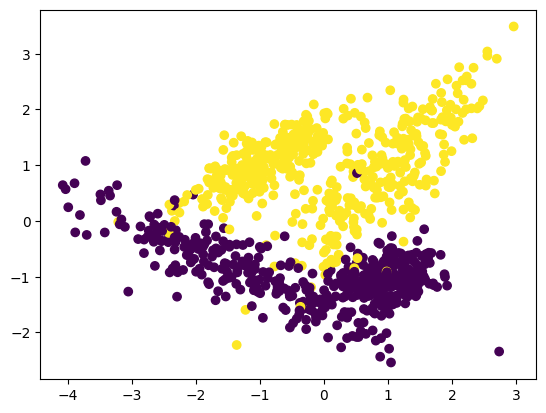

In [218]:
plt.scatter(pd.DataFrame(X)[0],pd.DataFrame(X)[1],c=y)

In [219]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [220]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [221]:
y_pred=svc.predict(X_test)

In [222]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       128
           1       0.96      0.93      0.94       122

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[123   5]
 [  9 113]]


In [223]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred=rbf.predict(X_test)

In [224]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       128
           1       0.99      0.93      0.96       122

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250

[[127   1]
 [  8 114]]


In [225]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred=poly.predict(X_test)

In [226]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       128
           1       0.95      0.95      0.95       122

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[122   6]
 [  6 116]]


In [227]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred=sigmoid.predict(X_test)

In [228]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       128
           1       0.83      0.86      0.84       122

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[106  22]
 [ 17 105]]


In [237]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf','poly']
}

In [238]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [239]:
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.980 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.933 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [241]:
print(grid.best_params_)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       128
           1       0.99      0.94      0.97       122

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[127   1]
 [  7 115]]
